In [81]:
import pandas as pd

In [82]:
df=pd.read_csv("../Dataset/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data preprocessing

In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
le=LabelEncoder()

In [85]:
df["Sex"]=le.fit_transform(df.Sex)

In [86]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [87]:
df["ChestPainType"]=le.fit_transform(df.ChestPainType)
df["RestingECG"]=le.fit_transform(df.RestingECG)
df["ExerciseAngina"]=le.fit_transform(df.ExerciseAngina)
df["ST_Slope"]=le.fit_transform(df.ST_Slope)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


[]

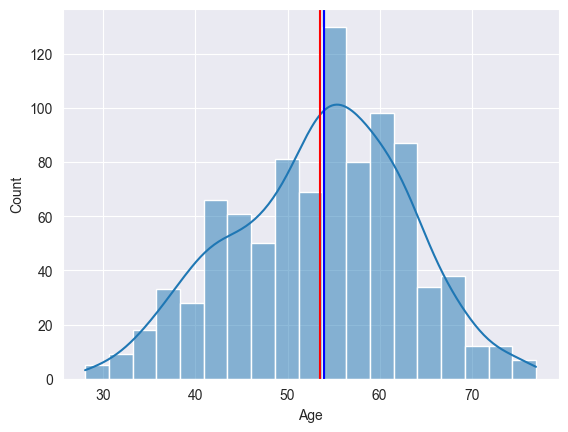

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df.Age,kde=True)
plt.axvline(df['Age'].mean(), color='Red')
plt.axvline(df['Age'].median(), color= 'Green')
plt.axvline(df['Age'].mode()[0], color='Blue')
plt.plot()

In [89]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

<Axes: xlabel='RestingBP', ylabel='Count'>

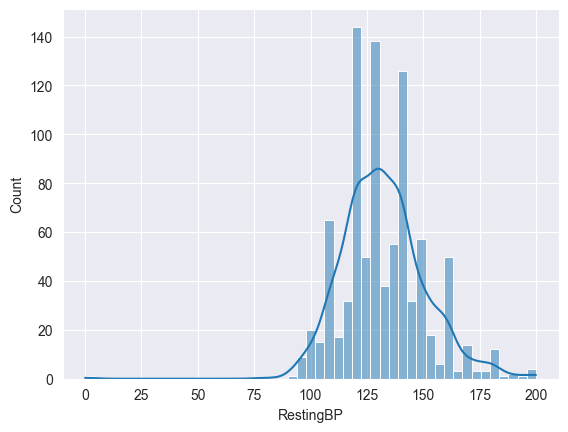

In [90]:
sns.histplot(df.RestingBP
,kde=True)

has outliers

In [91]:
df1=df[df.RestingBP<=(df.RestingBP.mean()+3*df.RestingBP.std())]

In [92]:
df1.shape

(911, 12)

In [93]:
df1[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]

C:\Users\supriya shrivastv\AppData\Local\Temp\ipykernel_6500\3454830836.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,1,0,118,529,0,1,130,0,0.0,1,1
149,54,1,0,130,603,1,1,125,1,1.0,1,1
616,67,0,2,115,564,0,0,160,0,1.6,1,0


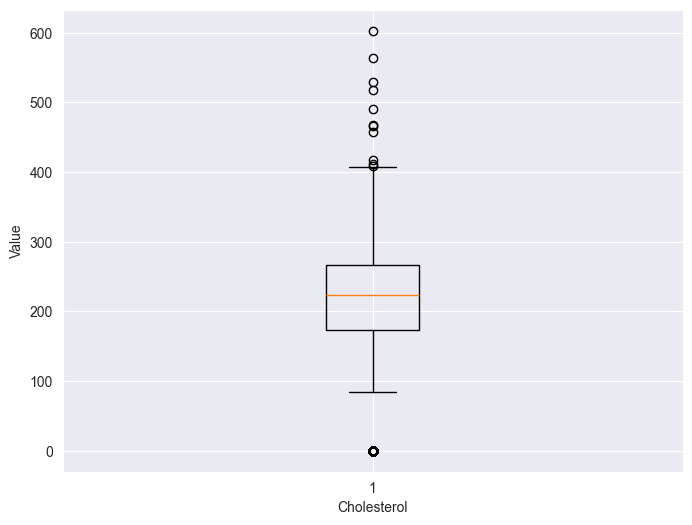

In [94]:
plt.figure(figsize=(8, 6))
plt.boxplot(df1['Cholesterol'])
plt.xlabel('Cholesterol')
plt.ylabel('Value')
plt.show()

In [95]:
df2 = df1[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]
df2.shape

C:\Users\supriya shrivastv\AppData\Local\Temp\ipykernel_6500\465507917.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df1[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]


(908, 12)

In [96]:
df2.groupby('Sex').size()

Sex
0    190
1    718
dtype: int64

[]

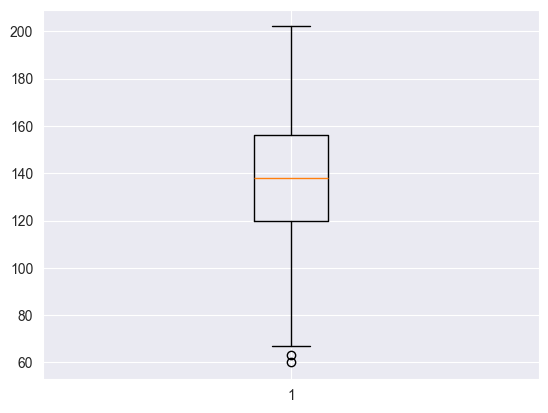

In [97]:
plt.boxplot(df.MaxHR)
plt.plot()

In [98]:
df3 = df2[df2.MaxHR<=(df2.MaxHR.mean()+3*df2.MaxHR.std())]
df3.shape

(908, 12)

In [99]:
df3.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

[]

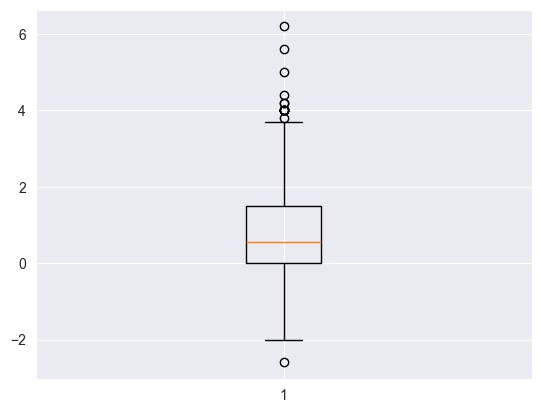

In [100]:
plt.boxplot(df3.Oldpeak)
plt.plot()

In [101]:
df4 = df3[df3.Oldpeak<=(df2.Oldpeak.mean()+3*df2.Oldpeak.std())]
df4.shape

(902, 12)

# Scaler

In [102]:
from sklearn.preprocessing import StandardScaler
X=df4.drop(columns=["HeartDisease"])
X=StandardScaler().fit_transform(X)

# Train and Test

In [106]:
from sklearn.model_selection import train_test_split
y=df4["HeartDisease"]

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Models

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [111]:
lr=GridSearchCV(LogisticRegression(max_iter=1000),param_grid={"C":[0.1,0.5,1,5,10]},cv=5)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.850828729281768

In [113]:
rfc=GridSearchCV(RandomForestClassifier(),param_grid={'n_estimators':[10,20,30]},cv=5)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.8674033149171271

In [115]:
dtc=GridSearchCV(DecisionTreeClassifier(),param_grid={'max_depth':[3,5,7,9]},cv=5)
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.8453038674033149

# Confusion Matrix"

In [139]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,lr.predict(X_test))

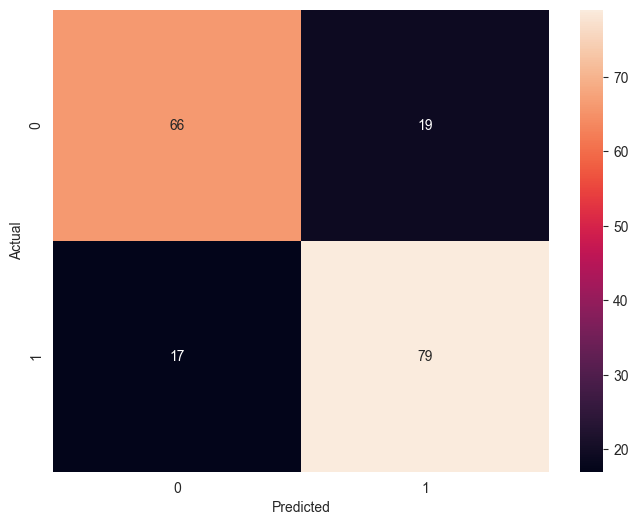

In [140]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Text(70.72222222222221, 0.5, 'Actual')

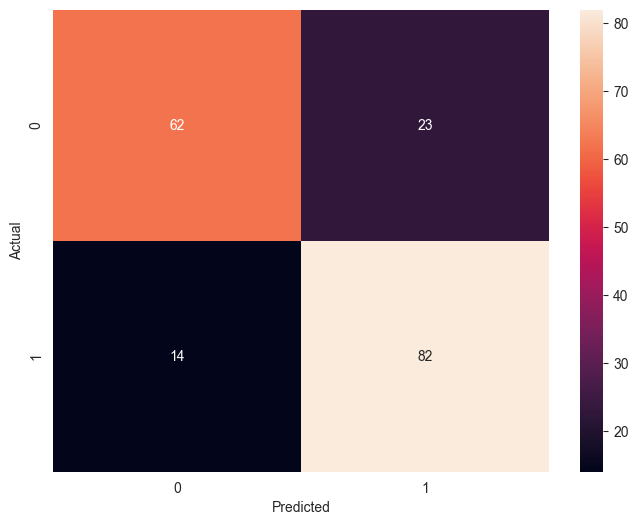

In [141]:
cm=confusion_matrix(y_test,rfc.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted") 
plt.ylabel("Actual")

Text(70.72222222222221, 0.5, 'Actual')

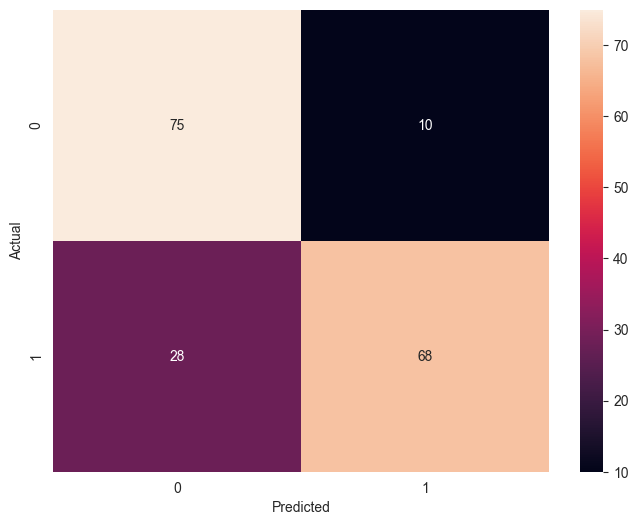

In [142]:
cm=confusion_matrix(y_test,dtc.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# PCA

In [153]:
from sklearn.decomposition import PCA
pca=PCA(n_components=9)
X_pca=pca.fit_transform(X)


In [154]:
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=42)

In [155]:
lr=GridSearchCV(LogisticRegression(max_iter=1000),param_grid={"C":[0.1,0.5,1,5,10]},cv=5)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.856353591160221

In [156]:
rfc=GridSearchCV(RandomForestClassifier(),param_grid={'n_estimators':[10,20,30]},cv=5)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.8453038674033149

In [157]:
dtc=GridSearchCV(DecisionTreeClassifier(),param_grid={'max_depth':[3,5,7,9]},cv=5)
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.8121546961325967

In [135]:
pca.explained_variance_ratio_

array([9.20087086e-01, 5.06637473e-02, 2.35746294e-02, 5.43957588e-03,
       9.11206560e-05, 6.00287655e-05, 2.94138909e-05])

In [136]:
pca.components_

array([[-8.59590525e-03, -7.95238997e-04,  6.91301770e-04,
         1.98665295e-02,  9.98019179e-01, -1.06996835e-03,
        -1.13366055e-03,  5.90330667e-02, -1.83152144e-04,
         3.50165593e-04,  7.42463938e-04],
       [ 1.71792305e-01,  2.26372382e-03, -1.04569928e-02,
         2.12852482e-01,  5.40556572e-02,  1.38696182e-03,
         3.17813707e-03, -9.60175671e-01,  7.61319176e-03,
         8.61417744e-03, -7.95169432e-03],
       [-1.11488461e-01,  1.65753825e-04, -3.40515317e-03,
        -9.65689109e-01,  3.20018329e-02, -2.09573413e-03,
        -7.76988324e-04, -2.32244225e-01, -1.27189734e-03,
        -5.86779189e-03, -8.38942390e-04],
       [ 9.78381981e-01, -1.03271639e-03,  5.43080318e-03,
        -1.47341593e-01,  2.90954920e-03,  6.88051153e-03,
        -7.49949461e-03,  1.42752919e-01,  1.71475295e-03,
         2.13753631e-02, -8.84884992e-03],
       [-2.03754214e-02,  6.08668301e-02, -4.71457964e-01,
        -3.84253183e-03, -4.46135914e-04,  2.42472905e-02,
  

Hence pca decreases the accuracy of the model as it reduces the dimensionality of model.